In [1]:
#Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
# Load and read the dataset through pandas
data = pd.read_csv("311_Service_Requests_from_2010_to_Present_20250323.csv")

In [5]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,64414281,03/20/2025 03:19:28 PM,03/20/2025 05:02:03 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11236.0,2085 ROCKAWAY PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.632596,-73.888338,"(40.63259628259463, -73.88833809670564)"
1,64414794,03/20/2025 03:19:22 PM,03/20/2025 03:39:42 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11222.0,100 MESEROLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726992,-73.952982,"(40.72699247279165, -73.95298167828521)"
2,64414181,03/20/2025 03:19:00 PM,NaN,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11249.0,70 CLYMER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704855,-73.966270,"(40.70485514682155, -73.96627000353222)"
3,64411248,03/20/2025 03:18:53 PM,03/20/2025 09:28:21 PM,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,11375.0,98-14 74 AVENUE,...,Car,NaN,NaN,NaN,NaN,NaN,NaN,40.708830,-73.845558,"(40.70882971474674, -73.84555840295383)"
4,64417264,03/20/2025 03:18:41 PM,03/20/2025 03:46:18 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10459.0,939 BRUCKNER BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.818579,-73.892365,"(40.81857942966234, -73.89236510680291)"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46315 entries, 0 to 46314
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      46315 non-null  int64  
 1   Created Date                    46315 non-null  object 
 2   Closed Date                     35972 non-null  object 
 3   Agency                          46315 non-null  object 
 4   Agency Name                     46315 non-null  object 
 5   Complaint Type                  46315 non-null  object 
 6   Descriptor                      45180 non-null  object 
 7   Location Type                   40537 non-null  object 
 8   Incident Zip                    45829 non-null  float64
 9   Incident Address                44428 non-null  object 
 10  Street Name                     44428 non-null  object 
 11  Cross Street 1                  32585 non-null  object 
 12  Cross Street 2                  

In [9]:
# Convert 'Created Date' and 'Closed Date' to datetime format
data["Created Date"] = pd.to_datetime(data["Created Date"], errors="coerce")
data["Closed Date"] = pd.to_datetime(data["Closed Date"], errors="coerce")

# Dropping rows where 'Created Date' is missing (critical field)
#After conversion we can remove the dates easily
data = data.dropna(subset=["Created Date"])

/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/1893332486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Created Date"] = pd.to_datetime(data["Created Date"], errors="coerce")
/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/1893332486.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Closed Date"] = pd.to_datetime(data["Closed Date"], errors="coerce")


/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/2019770849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = status_counts.values, y = status_counts.index, palette="pastel")


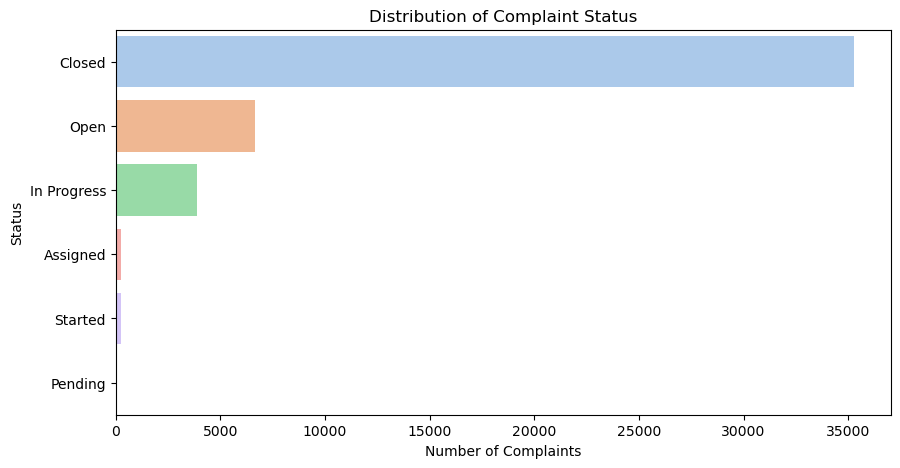

In [11]:
# Counting the unique values in the "Status" column
status_counts = data["Status"].value_counts()

# Barplot for status column and its distribution
plt.figure(figsize=(10, 5))
sns.barplot(x = status_counts.values, y = status_counts.index, palette="pastel")
plt.xlabel("Number of Complaints")
plt.ylabel("Status")
plt.title("Distribution of Complaint Status")
plt.show()

/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/3970938054.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_response_by_complaint.values, y = avg_response_by_complaint.index, palette="coolwarm")


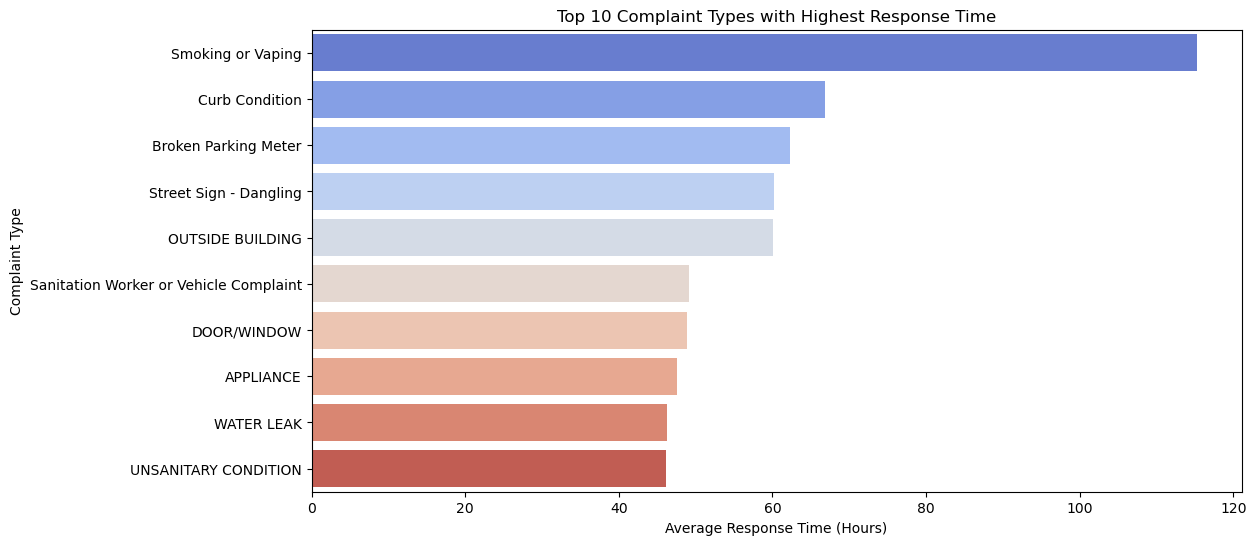

In [13]:
# Compute response time in hours
data["Response Time (Hours)"] = (data["Closed Date"] - data["Created Date"]).dt.total_seconds() / 3600

# Group by complaint type and compute average response time
avg_response_by_complaint = data.groupby("Complaint Type")["Response Time (Hours)"].mean().nlargest(10)

# Bar plot of complaint types with highest response time
plt.figure(figsize=(12, 6))
sns.barplot(x = avg_response_by_complaint.values, y = avg_response_by_complaint.index, palette="coolwarm")
plt.xlabel("Average Response Time (Hours)")
plt.ylabel("Complaint Type")
plt.title("Top 10 Complaint Types with Highest Response Time")
plt.show()

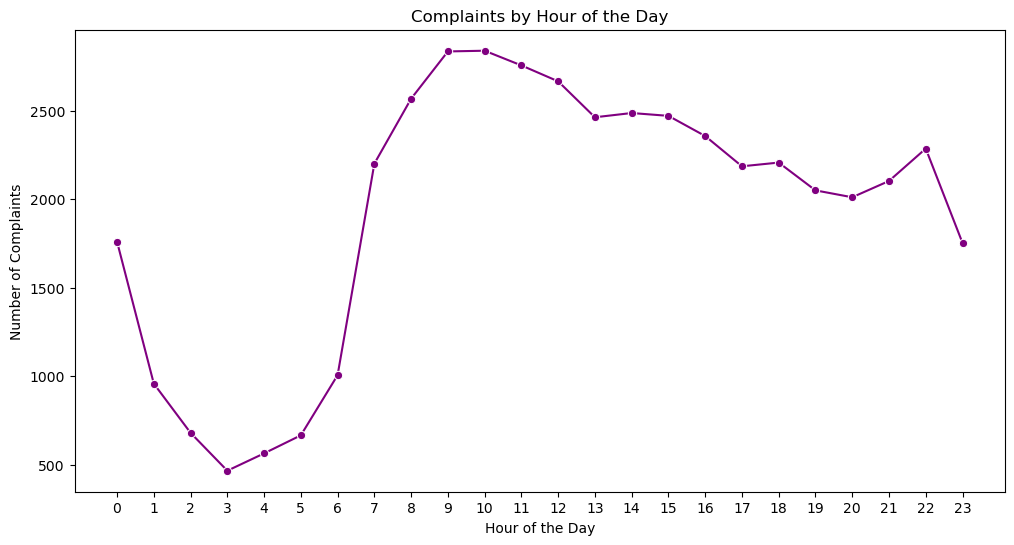

In [15]:
# Extract hour from "Created Date"
data["Hour"] = data["Created Date"].dt.hour

# Counting the complaints per hour
hourly_complaints = data["Hour"].value_counts().sort_index()

# Line plot of complaint volume by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x = hourly_complaints.index, y = hourly_complaints.values, marker="o", color="purple")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Complaints")
plt.title("Complaints by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()

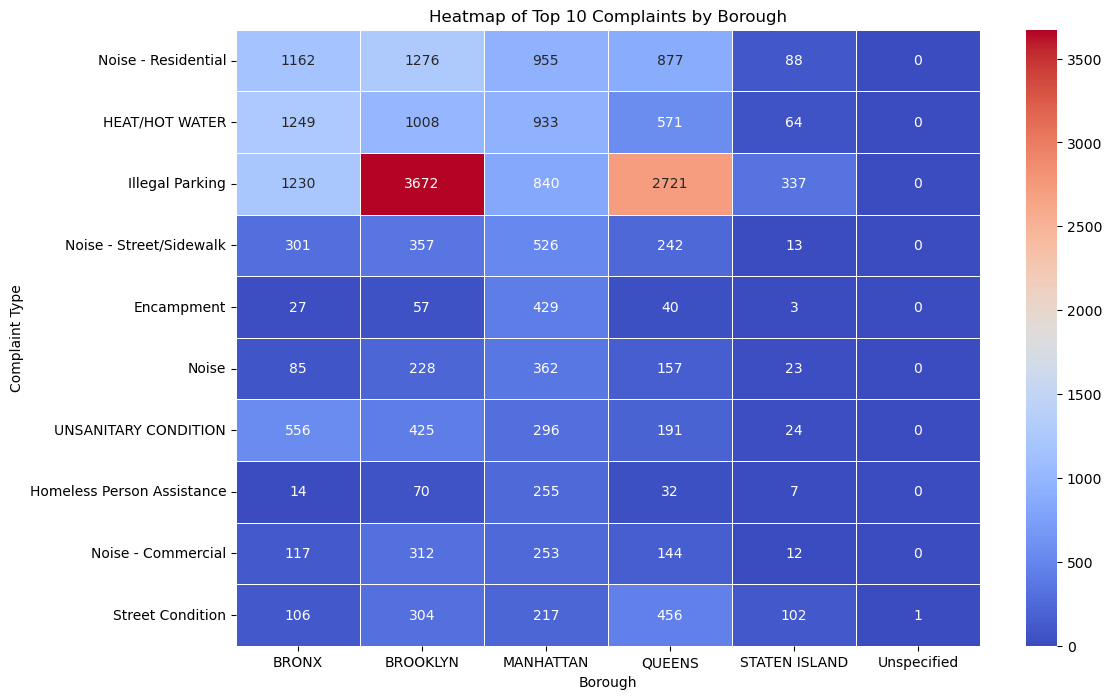

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table to prepare data for heatmap
heatmap_data = data.pivot_table(index="Complaint Type", columns="Borough", aggfunc="size", fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.nlargest(10, "MANHATTAN"), cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.xlabel("Borough")
plt.ylabel("Complaint Type")
plt.title("Heatmap of Top 10 Complaints by Borough")
plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present_20250323.csv')

# Data Preprocessing
# Convert date columns to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')

# Handle missing values
df['Descriptor'].fillna('Unknown', inplace=True)
df['Location Type'].fillna('Unknown', inplace=True)
df['Incident Address'].fillna('Unknown', inplace=True)

# Drop rows with missing 'Closed Date'
df.dropna(subset=['Closed Date'], inplace=True)

# Handle duplicates
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis (EDA)

# Top 10 most frequent complaint types
complaint_counts = df['Complaint Type'].value_counts().head(10)

# Plot the top 10 most frequent complaint types
plt.figure(figsize=(10, 6))
complaint_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top_10_Complaints.png')

# Trend of complaints over time
df['Year-Month'] = df['Created Date'].dt.to_period('M')
complaints_by_month = df.groupby('Year-Month').size()


# Complaint distribution across boroughs
borough_counts = df['Borough'].value_counts()

# Plot complaint distribution across boroughs
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='orange')
plt.title('Complaint Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Complaint_Distribution_Boroughs.png')

# Average resolution time by borough and complaint type
df['Resolution Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600  # in hours
avg_resolution_time = df.groupby(['Borough', 'Complaint Type'])['Resolution Time'].mean().unstack()

# Plot the average resolution time by borough and complaint type
plt.figure(figsize=(15, 8))
avg_resolution_time.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='viridis')
plt.title('Average Resolution Time by Borough and Complaint Type (in hours)')
plt.xlabel('Borough')
plt.ylabel('Average Resolution Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Resolution_Time_Borough_Complaint.png')

# Save the processed DataFrame
df.to_csv('processed_311_data.csv', index=False)

/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/2128266004.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/2128266004.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')
/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/2128266004.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present_20250323.csv')

# Data Preprocessing
# Convert 'Created Date' and 'Closed Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')

# Handle missing values by filling with 'Unknown' or dropping
df['Descriptor'].fillna('Unknown', inplace=True)
df['Location Type'].fillna('Unknown', inplace=True)
df['Incident Address'].fillna('Unknown', inplace=True)

# Drop rows with missing 'Closed Date' and handle duplicates
df.dropna(subset=['Closed Date'], inplace=True)
df.drop_duplicates(inplace=True)

# Feature Engineering: Convert 'Year-Month' to numeric (e.g., Year * 12 + Month)
df['Year'] = df['Created Date'].dt.year
df['Month'] = df['Created Date'].dt.month

/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/999931921.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/999931921.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')
/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/999931921.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

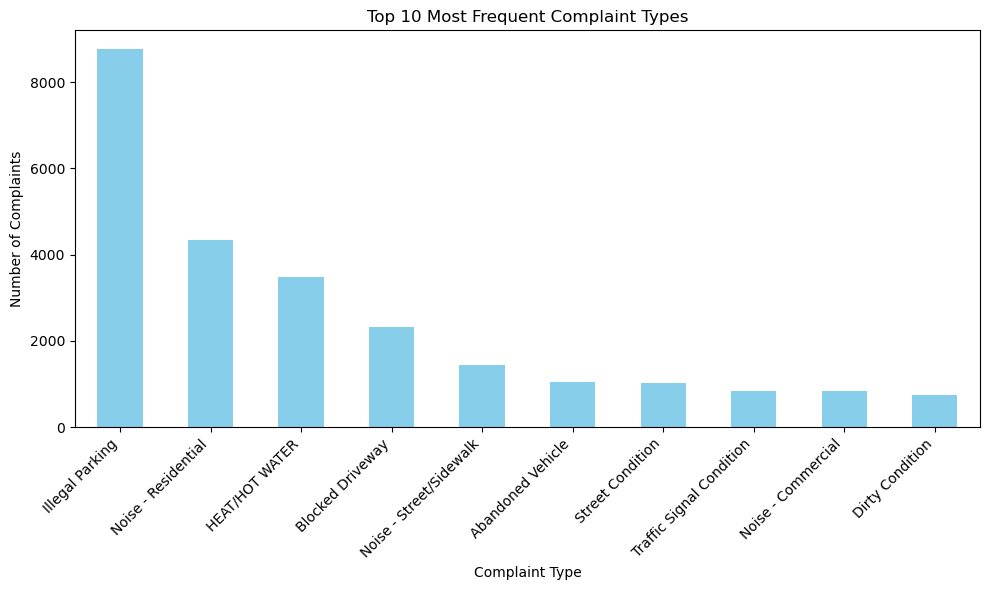

In [27]:
# Exploratory Data Analysis (EDA)

# Top 10 most frequent complaint types
complaint_counts = df['Complaint Type'].value_counts().head(10)

# Plot the top 10 most frequent complaint types
plt.figure(figsize=(10, 6))
complaint_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top_10_Complaints.png')
plt.show()

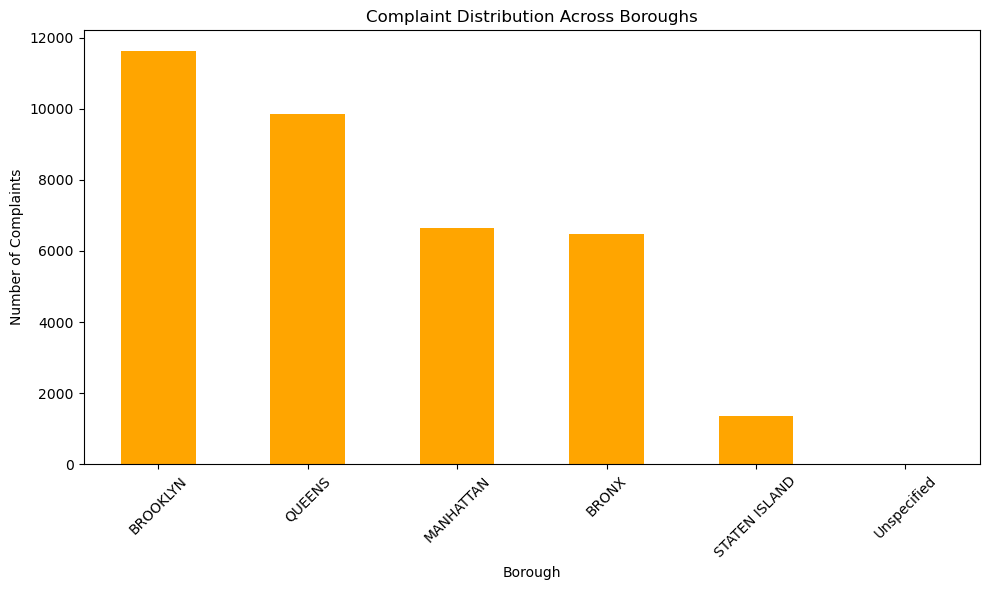

In [29]:
# Trend of complaints over time
df['Year-Month'] = df['Created Date'].dt.to_period('M')
complaints_by_month = df.groupby('Year-Month').size()


# Complaint distribution across boroughs
borough_counts = df['Borough'].value_counts()

# Plot complaint distribution across boroughs
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='orange')
plt.title('Complaint Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Complaint_Distribution_Boroughs.png')
plt.show()

/var/folders/b9/_7_ym1fd1rdbg0zctztzbfkm0000gn/T/ipykernel_2410/3906973120.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

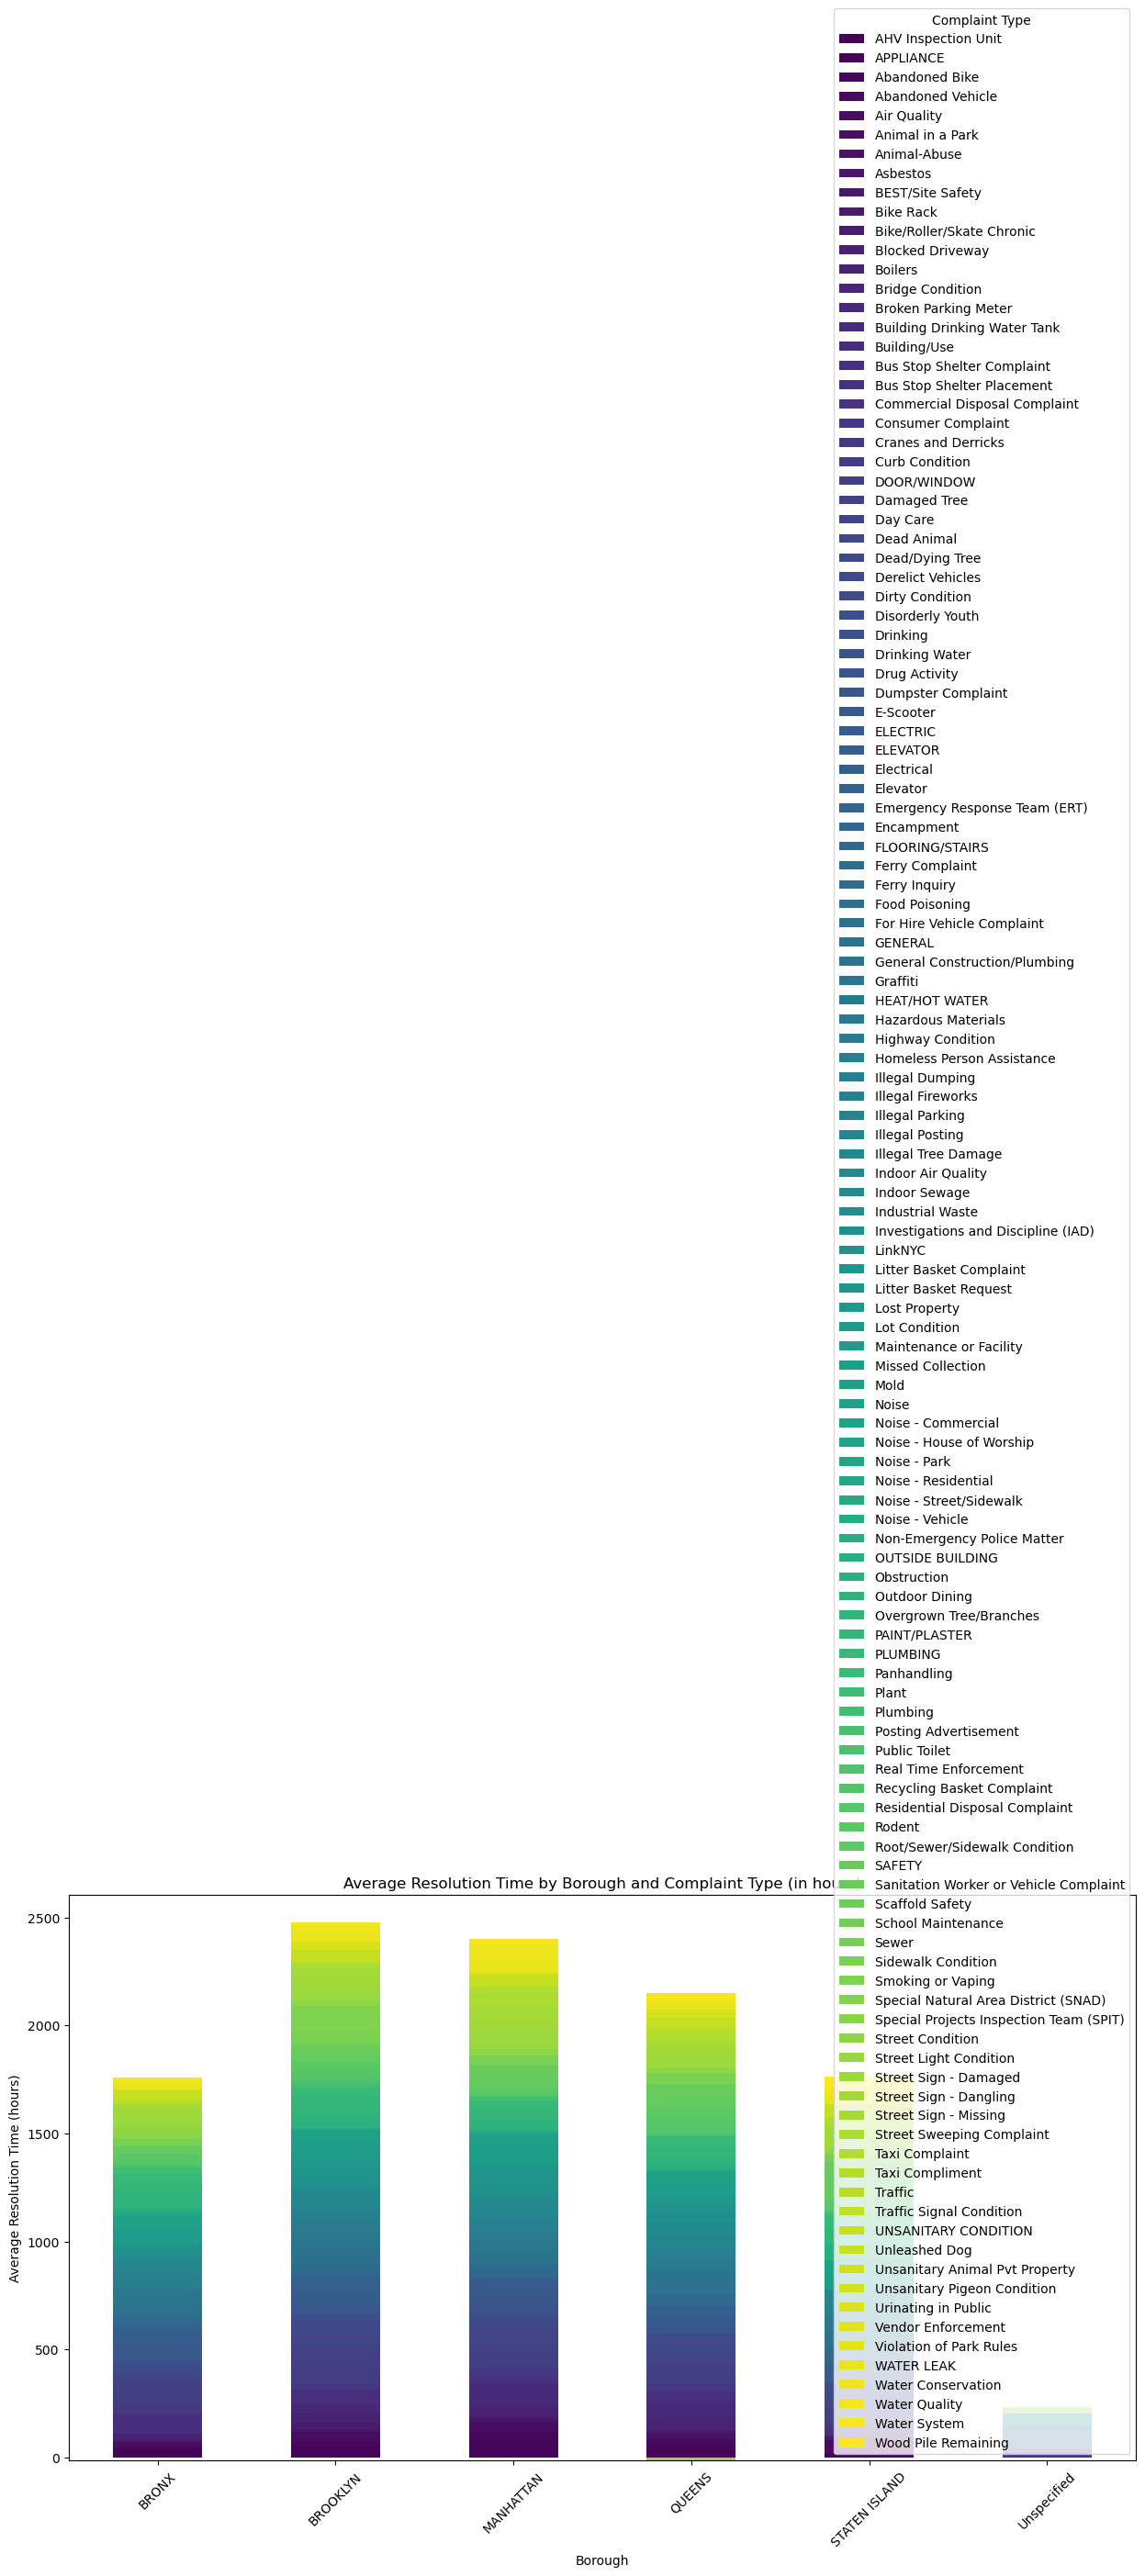

In [31]:
# Average resolution time by borough and complaint type
df['Resolution Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600  # in hours
avg_resolution_time = df.groupby(['Borough', 'Complaint Type'])['Resolution Time'].mean().unstack()

# Plot the average resolution time by borough and complaint type
plt.figure(figsize=(15, 8))
avg_resolution_time.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='viridis')
plt.title('Average Resolution Time by Borough and Complaint Type (in hours)')
plt.xlabel('Borough')
plt.ylabel('Average Resolution Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Resolution_Time_Borough_Complaint.png')
plt.show()